# Part 1

### Import Libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

C:\Users\schne\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Libraries imported.


In [4]:
#Download the wiki table to a readable df format
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")[0]
print(df.shape)
df.head()


(180, 3)


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"



### Data Preprocessing

In [5]:
#Remove entries where Borough = "Not Assigned"
df = df[df.Borough != "Not assigned"]

In [6]:
#Check if any neighborhoods are still unassigned 
df=df.rename(columns={"Neighbourhood" : "Neighborhood"})
df

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [7]:
#If neighborhoods still contain "Not Assigned", but have an associated Borough, run the code below to transform Neighborhood NA's to Burough name
df['Neighborhood'].replace({'Not assigned':df['Borough']}, inplace = True)

In [8]:
#Reset df index
df = df.reset_index(drop=True)
df.head(30)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


#### Check the shape of the data frame

In [9]:
df.shape

(103, 3)

In [10]:
### Convert Neighborhood strings to lists
lst_col='Neighborhood'

df = df.assign(**{lst_col:df[lst_col].str.split(',')})
# Check df 
df

### Explode Neighborhood lists to unique columns
df=df.explode('Neighborhood')


print(df.shape)
df
df = df.reset_index(drop=True)
df

(217, 3)


,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park
3,M5A,Downtown Toronto,Harbourfront
4,M6A,North York,Lawrence Manor
5,M6A,North York,Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park
7,M7A,Downtown Toronto,Ontario Provincial Government
8,M9A,Etobicoke,Islington Avenue
9,M9A,Etobicoke,Humber Valley Village


### Append LatLng Coordinates to Area Code

In [11]:
#Rename df column (Wiki data has changed since V1)
df=df.rename(columns={'Post Code' : 'Postal Code'})

In [12]:
df_latlng=pd.read_csv("http://cocl.us/Geospatial_data")

In [13]:
df_latlng

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [14]:
df=df.merge(df_latlng, left_on = "Postal Code", right_on = "Postal Code")

In [15]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,M6A,North York,Lawrence Manor,43.718518,-79.464763


### Geocoder package unreliable. To be used with a later version

In [1]:
import geocoder 

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
    g = geocoder.google('{}, Toronto, Ontario'.format(df['Postal Code']), maxRows = 103)
    lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    


ModuleNotFoundError: No module named 'geocoder'

# Part 3

In [17]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.6534817, -79.3839347.


In [18]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Create dataframe for 'Toronto' Boroughs

#### Isolate Buroughs containing name "Toronto"

In [19]:
toronto_data = df[df['Borough'].str.contains('Toronto', regex = False)].reset_index(drop=True)
toronto_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
1,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
2,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
3,M7A,Downtown Toronto,Ontario Provincial Government,43.662301,-79.389494
4,M5B,Downtown Toronto,Garden District,43.657162,-79.378937


In [20]:
toronto_data.describe

<bound method NDFrame.describe of    Postal Code           Borough  \
0          M5A  Downtown Toronto   
1          M5A  Downtown Toronto   
2          M7A  Downtown Toronto   
3          M7A  Downtown Toronto   
4          M5B  Downtown Toronto   
5          M5B  Downtown Toronto   
6          M5C  Downtown Toronto   
7          M4E      East Toronto   
8          M5E  Downtown Toronto   
9          M5G  Downtown Toronto   
10         M6G  Downtown Toronto   
11         M5H  Downtown Toronto   
12         M5H  Downtown Toronto   
13         M5H  Downtown Toronto   
14         M6H      West Toronto   
15         M6H      West Toronto   
16         M5J  Downtown Toronto   
17         M5J  Downtown Toronto   
18         M5J  Downtown Toronto   
19         M6J      West Toronto   
20         M6J      West Toronto   
21         M4K      East Toronto   
22         M4K      East Toronto   
23         M5K  Downtown Toronto   
24         M5K  Downtown Toronto   
25         M6K      West Toron

In [21]:
# create map of Toronto(burough) using latitude and longitude values
map_toronto_b = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_b)  
    
map_toronto_b

### Hide

In [22]:
#@hidden_cell
CLIENT_ID = '1P3HBU5ISMR5YVJ1JLUMNR0LDKKGCVTZVXT354TSIJHJGWEE' # your Foursquare ID
CLIENT_SECRET = 'FHGBAV33NAO3MVLJ1STYM042ZHTBOAWRKD041FSQDVT4GAAE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1P3HBU5ISMR5YVJ1JLUMNR0LDKKGCVTZVXT354TSIJHJGWEE
CLIENT_SECRET:FHGBAV33NAO3MVLJ1STYM042ZHTBOAWRKD041FSQDVT4GAAE


In [23]:
### Open Foursquare Credentials
with open (r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\fsquarecreds.json') as f:
    data = json.load(f)
    fsquare_creds = {'CLIENT_ID':data['CLIENT_ID'],'CLIENT_SECRET':data['CLIENT_SECRET'],'VERSION':data['VERSION']}


In [24]:
limit = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
####code to run the above function on each neighborhood and create a new dataframe called *df_venues*

toronto_data_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Regent Park
 Harbourfront
Queen's Park
 Ontario Provincial Government
Garden District
 Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond
 Adelaide
 King
Dufferin
 Dovercourt Village
Harbourfront East
 Union Station
 Toronto Islands
Little Portugal
 Trinity
The Danforth West
 Riverdale
Toronto Dominion Centre
 Design Exchange
Brockton
 Parkdale Village
 Exhibition Place
India Bazaar
 The Beaches West
Commerce Court
 Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
 Forest Hill Road Park
High Park
 The Junction South
North Toronto West
 Lawrence Park
The Annex
 North Midtown
 Yorkville
Parkdale
 Roncesvalles
Davisville
University of Toronto
 Harbord
Runnymede
 Swansea
Moore Park
 Summerhill East
Kensington Market
 Chinatown
 Grange Park
Summerhill West
 Rathnelly
 South Hill
 Forest Hill SE
 Deer Park
CN Tower
 King and Spadina
 Railway Lands
 Harbourfront West
 Bathurst Quay
 South Niagara
 Island airport
R

In [27]:
print(toronto_data_venues.shape)
toronto_data_venues.head()


(3208, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Regent Park,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Regent Park,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Regent Park,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Regent Park,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Regent Park,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [28]:
toronto_data_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adelaide,100,100,100,100,100,100
Bathurst Quay,15,15,15,15,15,15
Cabbagetown,43,43,43,43,43,43
Chinatown,64,64,64,64,64,64
Deer Park,16,16,16,16,16,16
Design Exchange,100,100,100,100,100,100
Dovercourt Village,16,16,16,16,16,16
Exhibition Place,23,23,23,23,23,23
Forest Hill Road Park,4,4,4,4,4,4


In [29]:
## Number of Unique Categoriges
print('There are {} uniques categories.'.format(len(toronto_data_venues['Venue Category'].unique())))

There are 232 uniques categories.


### Format Data for K-Means Clustering

In [30]:
# one hot encoding
toronto_data_onehot = pd.get_dummies(toronto_data_venues['Venue Category'], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
toronto_data_onehot['Neighborhood'] = toronto_data_venues['Neighborhood'] 
toronto_data_onehot.head()

,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Regent Park
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [31]:
# move neighborhood column to the first column
fixed_columns = [toronto_data_onehot.columns[-1]] + list(toronto_data_onehot.columns[:-1])
print(fixed_columns)

toronto_data_onehot = toronto_data_onehot[fixed_columns]
toronto_data_onehot.head()

['Neighborhood', ' Afghan Restaurant', ' Airport', ' Airport Food Court', ' Airport Lounge', ' Airport Service', ' Airport Terminal', ' American Restaurant', ' Antique Shop', ' Aquarium', ' Art Gallery', ' Art Museum', ' Arts & Crafts Store', ' Asian Restaurant', ' Athletics & Sports', ' Auto Workshop', ' BBQ Joint', ' Baby Store', ' Bagel Shop', ' Bakery', ' Bank', ' Bar', ' Baseball Stadium', ' Basketball Stadium', ' Beach', ' Bed & Breakfast', ' Beer Bar', ' Beer Store', ' Belgian Restaurant', ' Bistro', ' Board Shop', ' Boat or Ferry', ' Bookstore', ' Boutique', ' Brazilian Restaurant', ' Breakfast Spot', ' Brewery', ' Bubble Tea Shop', ' Building', ' Burger Joint', ' Burrito Place', ' Bus Line', ' Butcher', ' Café', ' Cajun / Creole Restaurant', ' Camera Store', ' Candy Store', ' Caribbean Restaurant', ' Cheese Shop', ' Chinese Restaurant', ' Chocolate Shop', ' Church', ' Climbing Gym', ' Clothing Store', ' Cocktail Bar', ' Coffee Shop', ' College Arts Building', ' College Auditor

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Regent Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Regent Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [32]:
toronto_data_onehot.shape

(3208, 233)

In [33]:
toronto_data_grouped = toronto_data_onehot.groupby('Neighborhood').mean().reset_index()


In [34]:
toronto_data_grouped.shape

(77, 233)

In [35]:
num_top_venues = 5

for hood in toronto_data_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_data_grouped[toronto_data_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Adelaide----
             venue  freq
0      Coffee Shop  0.09
1             Café  0.05
2   Clothing Store  0.04
3            Hotel  0.04
4              Gym  0.04


---- Bathurst Quay----
                  venue  freq
0       Airport Service  0.20
1        Airport Lounge  0.13
2       Harbor / Marina  0.07
3                   Bar  0.07
4   Rental Car Location  0.07


---- Cabbagetown----
          venue  freq
0   Coffee Shop  0.12
1          Café  0.07
2        Bakery  0.05
3   Pizza Place  0.05
4          Park  0.05


---- Chinatown----
                            venue  freq
0                            Café  0.08
1                     Coffee Shop  0.06
2   Vegetarian / Vegan Restaurant  0.06
3           Vietnamese Restaurant  0.05
4              Mexican Restaurant  0.05


---- Deer Park----
                 venue  freq
0          Coffee Shop  0.12
1                  Pub  0.12
2   Light Rail Station  0.06
3           Sports Bar  0.06
4     Sushi Restaurant  0.06


---- Design Ex

4                     Men's Store  0.04


----Moore Park----
                venue  freq
0               Trail   0.5
1          Restaurant   0.5
2   Afghan Restaurant   0.0
3              Museum   0.0
4              Market   0.0


----North Toronto West----
             venue  freq
0   Clothing Store  0.10
1      Coffee Shop  0.10
2      Yoga Studio  0.05
3        Pet Store  0.05
4              Spa  0.05


----Parkdale----
                          venue  freq
0                Breakfast Spot  0.14
1                     Gift Shop  0.14
2                  Dessert Shop  0.07
3   Eastern European Restaurant  0.07
4                 Movie Theater  0.07


----Queen's Park----
               venue  freq
0        Coffee Shop  0.30
1              Diner  0.07
2        Yoga Studio  0.03
3   Sushi Restaurant  0.03
4           Beer Bar  0.03


----Regent Park----
          venue  freq
0   Coffee Shop  0.17
1           Pub  0.07
2          Park  0.07
3        Bakery  0.07
4          Café  0.04


----

In [36]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

['Neighborhood',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']

In [38]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_data_grouped['Neighborhood']
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bathurst Quay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cabbagetown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chinatown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Deer Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
print(np.arange(toronto_data_grouped.shape[0]))
for ind in np.arange(toronto_data_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_data_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Coffee Shop,Café,Hotel,Restaurant,Gym,Clothing Store,Thai Restaurant,Steakhouse,Deli / Bodega,Pizza Place
1,Bathurst Quay,Airport Service,Airport Lounge,Harbor / Marina,Sculpture Garden,Rental Car Location,Plane,Coffee Shop,Boat or Ferry,Bar,Airport Terminal
2,Cabbagetown,Coffee Shop,Café,Italian Restaurant,Restaurant,Pub,Pizza Place,Park,Bakery,Playground,Chinese Restaurant
3,Chinatown,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Bar,Mexican Restaurant,Vietnamese Restaurant,Park,Dessert Shop,Burger Joint,Grocery Store
4,Deer Park,Coffee Shop,Pub,Supermarket,Light Rail Station,Vietnamese Restaurant,Sushi Restaurant,Liquor Store,Bagel Shop,American Restaurant,Pizza Place


In [40]:
toronto_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
1,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
2,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
3,M7A,Downtown Toronto,Ontario Provincial Government,43.662301,-79.389494
4,M5B,Downtown Toronto,Garden District,43.657162,-79.378937
5,M5B,Downtown Toronto,Ryerson,43.657162,-79.378937
6,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
7,M4E,East Toronto,The Beaches,43.676357,-79.293031
8,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
9,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383


## K-Means Clustering

In [41]:
# set number of clusters
kclusters = 5

toronto_data_grouped_clustering = toronto_data_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_data_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 0, 0, 0, 0, 0, 0, 2, 0])

### Check for Optimal K (elbow Method)

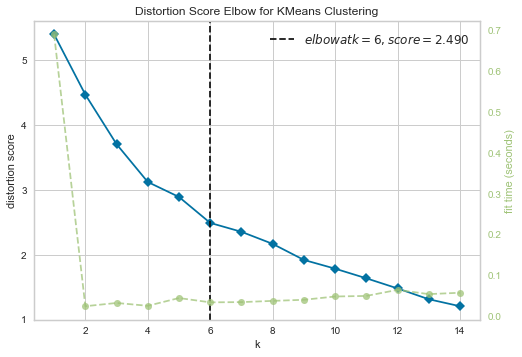

In [42]:
# Instantiate the clustering model and visualizer
model = KMeans().fit(toronto_data_grouped_clustering)
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(toronto_data_grouped_clustering)        # Fit the data to the visualizer
visualizer.show() 

#### Optimal K appears to be '5'. exponential nature of distortion makes for suspect of validity of using K-Means Clustinger

In [43]:
# set number of clusters
kclusters = 6

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 0, 0, 0, 0, 0, 0, 2, 0])

In [44]:
# add clustering labels #Comment this cell when run
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [45]:

toronto_data_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_data_merged = toronto_data_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_data_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Dessert Shop,Shoe Store,Restaurant
1,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Dessert Shop,Shoe Store,Restaurant
2,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,0,Coffee Shop,Diner,Yoga Studio,Arts & Crafts Store,Bar,Bank,Café,Sushi Restaurant,Beer Bar,Distribution Center
3,M7A,Downtown Toronto,Ontario Provincial Government,43.662301,-79.389494,0,Coffee Shop,Diner,Yoga Studio,Arts & Crafts Store,Bar,Bank,Café,Sushi Restaurant,Beer Bar,Distribution Center
4,M5B,Downtown Toronto,Garden District,43.657162,-79.378937,0,Coffee Shop,Clothing Store,Japanese Restaurant,Café,Bubble Tea Shop,Italian Restaurant,Cosmetics Shop,Bookstore,Fast Food Restaurant,Middle Eastern Restaurant


In [46]:
#Remove N/A Values
#toronto_data_merged=toronto_data_merged.dropna()

In [47]:
# check the data type
#toronto_data_merged['Cluster Labels']=toronto_data_merged['Cluster Labels'].astype(int)

In [48]:
toronto_data_merged.dtypes

Postal Code                object
Borough                    object
Neighborhood               object
Latitude                  float64
Longitude                 float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [49]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_data_merged['Latitude'], toronto_data_merged['Longitude'], toronto_data_merged['Neighborhood'], toronto_data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Coffee and Quick Bites Cluster

In [51]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 0, toronto_data_merged.columns[[2] + list(range(5, toronto_data_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Regent Park,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Dessert Shop,Shoe Store,Restaurant
1,Harbourfront,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Dessert Shop,Shoe Store,Restaurant
2,Queen's Park,0,Coffee Shop,Diner,Yoga Studio,Arts & Crafts Store,Bar,Bank,Café,Sushi Restaurant,Beer Bar,Distribution Center
3,Ontario Provincial Government,0,Coffee Shop,Diner,Yoga Studio,Arts & Crafts Store,Bar,Bank,Café,Sushi Restaurant,Beer Bar,Distribution Center
4,Garden District,0,Coffee Shop,Clothing Store,Japanese Restaurant,Café,Bubble Tea Shop,Italian Restaurant,Cosmetics Shop,Bookstore,Fast Food Restaurant,Middle Eastern Restaurant
5,Ryerson,0,Coffee Shop,Clothing Store,Japanese Restaurant,Café,Bubble Tea Shop,Italian Restaurant,Cosmetics Shop,Bookstore,Fast Food Restaurant,Middle Eastern Restaurant
6,St. James Town,0,Coffee Shop,Café,Restaurant,Italian Restaurant,Clothing Store,Gastropub,Cocktail Bar,Park,Bakery,Cosmetics Shop
7,The Beaches,0,Health Food Store,Coffee Shop,Asian Restaurant,Neighborhood,Trail,Pub,Discount Store,Dessert Shop,Dim Sum Restaurant,Diner
8,Berczy Park,0,Coffee Shop,Seafood Restaurant,Bakery,Restaurant,Café,Beer Bar,Cocktail Bar,Cheese Shop,Farmers Market,Irish Pub
9,Central Bay Street,0,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Salad Place,Bubble Tea Shop,Burger Joint,Japanese Restaurant,Department Store,Indian Restaurant


# Outdoor and Recreation Cluster

In [ ]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 1, toronto_data_merged.columns[[2] + list(range(5, toronto_data_merged.shape[1]))]]

# Random Cluster 1

In [ ]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 2, toronto_data_merged.columns[[2] + list(range(5, toronto_data_merged.shape[1]))]]

# Air-Travel Cluster

In [ ]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 3, toronto_data_merged.columns[[2] + list(range(5, toronto_data_merged.shape[1]))]]

# Random Cluster 3

In [ ]:
toronto_data_merged.loc[toronto_data_merged['Cluster Labels'] == 4, toronto_data_merged.columns[[2] + list(range(5, toronto_data_merged.shape[1]))]]

In [ ]:
#@hidden_cell
CLIENT_ID = '1P3HBU5ISMR5YVJ1JLUMNR0LDKKGCVTZVXT354TSIJHJGWEE' # your Foursquare ID
CLIENT_SECRET = 'FHGBAV33NAO3MVLJ1STYM042ZHTBOAWRKD041FSQDVT4GAAE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
### Open Foursquare Credentials
with open (r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\fsquarecreds.json') as f:
    data = json.load(f)
    fsquare_creds = {'CLIENT_ID':data['CLIENT_ID'],'CLIENT_SECRET':data['CLIENT_SECRET'],'VERSION':data['VERSION']}


In [ ]:
limit = 100
def getPopulationDensity(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
####code to run the above function on each neighborhood and create a new dataframe called *df_venues*

toronto_data_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

In [ ]:
import requests

url = "https://www.arcgis.com/sharing/rest/oauth2/token"

payload = 'client_id=2fdnV2kg8P2y1h04&client_secret=c10dfd75ca354671b4dd874583e4dd84&grant_type=client_credentials&expiration=1209600'
headers = {
  'Content-Type': 'application/x-www-form-urlencoded'
}

response = requests.request("POST", url, headers=headers, data = payload)

print(response.text.encode('utf8'))




In [ ]:
limit = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
           
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
rdurl='https://www.google.com/'

In [ ]:
url = 'https://geoenrich.arcgis.com/arcgis/rest/services/World/geoenrichmentserver/GeoEnrichment/enrich?studyAreas=[{"geometry":{"x":-73.9712,"y":40.7831}}]&studyAreasOptions={"areaType":"RingBuffer","bufferUnits":"esriMeters","bufferRadii":[500]}&dataCollections=["KeyGlobalFacts", "KeyUSFacts","KeyCANFacts"]&f=json&token=bgIYJBKX6KM4HKxGkECP0H3uyqSaXKuUCn0I3rkL4nl6Dmwxtylir1XqYZ0NsYykCMhm8KqaLctacBmB8V0TFttSx4uFSsWsnjsYMoagpsDe3hM64mEfC_WMn7IAJsH315NrLj66kgThQe5mhzRbhQ..&inSR=4326&OutSR=4326&return Geometry=true'
results = requests.get(url).json()
results

In [ ]:
 # create the API request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        limit)

In [ ]:
toronto_data.sample(frac=1)

In [ ]:
import pandas as pd
import requests
import geopy

from geopy.geocoders import ArcGIS




In [ ]:
geolocator = geopy.geocoders.ArcGIS(username="WWSscript",password="Z3MWMrnEhXid4Z3",referer="https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer",token_lifetime=5)
geolocator

In [ ]:
# initialize your variable to None
lat_lng_coords = None

In [ ]:
from functools import partial
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm
tqdm.pandas()

In [ ]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [ ]:
df['location'] = df['{},{}'.format(df['Borough'], df['Neighborhood'])].apply(geocode,axis=0)

df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)


In [1]:

# initialize your variable to None
lat_lng_coords = None

while(lat_lng_coords is None):
    g = geocode(df['Neighborhood'])
    lat_lng_coords =g.latlng
latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

NameError: name 'geocode' is not defined

In [ ]:
df2=pd.read_json('http://localhost:8888/lab/tree/Desktop/IBM%20Data%20Science%20Certification/Python%20v2/Applied%20Data%20Science%20Capstone/Neighbourhoods.json')

In [ ]:
df.concat(df['Neighborhood'],df['Borough'])